In [12]:
import numpy as np
import arviz as az
import math
# import pymc3 as pm
import pickle
import matplotlib.pyplot as plt
from google.protobuf import text_format
from scipy.stats import multivariate_normal as mvn
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.interpolate import griddata
import pp_mix.protos.py.params_pb2 as params_pb2
import statistics as stat

from pp_mix.interface import ConditionalMCMC, cluster_estimate
from pp_mix.utils import loadChains, to_numpy, to_proto
from pp_mix.protos.py.state_pb2 import MultivariateMixtureState, EigenVector, EigenMatrix
from pp_mix.protos.py.params_pb2 import Params

ModuleNotFoundError: No module named 'pp_mix'

In [2]:
import pandas as pd
with open("data/data_by_rule_student/p_50_d_2_M_4_nperclus_50_data.csv", newline='') as my_csv:
    data = pd.read_csv(my_csv, sep=',', header=None).values
    
print(data.shape)

(200, 50)


In [2]:
import pandas as pd
p = 50
d = 2
M = 4
n_percluster_s = [50]

log_every = 1000
ntrick = 5000
nburn = 20000
niter = 20000
thin = 5

#for n_pc in n_percluster_s:
n_pc=50

print("Running p=50 d=2 M=4 nperclus={0}".format(n_pc))
with open("data/data_by_rule_student/p_50_d_2_M_4_nperclus_{0}_data.csv".format(n_pc), newline='') as my_csv:
    data = pd.read_csv(my_csv, sep=',', header=None).values

ranges = np.array([[-20,20],]*d).transpose()

#sampler = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_30.asciipb")
#sampler.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_R20_p_50_d_2_M_4_nperclus_50_N_30.recordio")
#acc_rates = np.array([sampler.means_ar, sampler.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_R20_p_50_d_2_M_4_nperclus_50_N_30.csv", acc_rates, delimiter=",")


#sampler0 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/c50_s95_sp_p_50_d_2_M_4_n_50_N_30.asciipb")
#sampler0.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler0.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_c50_s95_p_50_d_2_M_4_nperclus_50_N_30.recordio")
#acc_rates0 = np.array([sampler0.means_ar, sampler0.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c50_s95_p_50_d_2_M_4_nperclus_50_N_30.csv", acc_rates0, delimiter=",")


#sampler1 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_30.asciipb")
#sampler1.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler1.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30.recordio")
#acc_rates1 = np.array([sampler1.means_ar, sampler1.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_30.csv", acc_rates1, delimiter=",")


#sampler2 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_30_sec.asciipb")
#sampler2.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler2.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30_sec.recordio")
#acc_rates2 = np.array([sampler2.means_ar, sampler2.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_30_sec.csv", acc_rates2, delimiter=",")


#sampler3 = ConditionalMCMC(params_file = "data/data_by_rule_student/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_15.asciipb")
#sampler3.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler3.serialize_chains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15.recordio")
#acc_rates3 = np.array([sampler3.means_ar, sampler3.lambda_ar])
#np.savetxt("data/data_by_rule_student/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_15.csv", acc_rates3, delimiter=",")


#sampler4 = ConditionalMCMC(params_file = "data/data_by_rule/params_compare_CD/sp_p_50_d_2_M_4_n_50_N_15_sec.asciipb")
#sampler4.run(ntrick, nburn, niter, thin, data, ranges, log_every)
#sampler4.serialize_chains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15_sec.recordio")
#acc_rates4 = np.array([sampler4.means_ar, sampler4.lambda_ar])
#np.savetxt("data/data_by_rule/chains_compare_CD/acc_rate_p_50_d_2_M_4_nperclus_50_N_15_sec.csv", acc_rates4, delimiter=",")


Running p=50 d=2 M=4 nperclus=50
Number means in trick phase:  10
Trick, iter # 1000  /  5000
Trick, iter # 2000  /  5000
Trick, iter # 3000  /  5000
Trick, iter # 4000  /  5000
Trick, iter # 5000  /  5000
Burnin, iter # 1000  /  20000
Burnin, iter # 2000  /  20000
Burnin, iter # 3000  /  20000
Burnin, iter # 4000  /  20000
Burnin, iter # 5000  /  20000
Burnin, iter # 6000  /  20000
Burnin, iter # 7000  /  20000
Burnin, iter # 8000  /  20000
Burnin, iter # 9000  /  20000
Burnin, iter # 10000  /  20000
Burnin, iter # 11000  /  20000
Burnin, iter # 12000  /  20000
Burnin, iter # 13000  /  20000
Burnin, iter # 14000  /  20000
Burnin, iter # 15000  /  20000
Burnin, iter # 16000  /  20000
Burnin, iter # 17000  /  20000
Burnin, iter # 18000  /  20000
Burnin, iter # 19000  /  20000
Burnin, iter # 20000  /  20000
Running, iter # 1000  /  20000
Running, iter # 2000  /  20000
Running, iter # 3000  /  20000
Running, iter # 4000  /  20000
Running, iter # 5000  /  20000
Running, iter # 6000  /  200

In [3]:
#chain50N30 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)
#chain50N30_sec = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_30_sec.recordio", MultivariateMixtureState)
#chain50N15 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15.recordio", MultivariateMixtureState)
#chain50N15_sec = loadChains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_50_N_15_sec.recordio", MultivariateMixtureState)
chain_c150_N30 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_R20_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)


#chain50N30_c50 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c50_s8_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)
#chain50N30_c50_s95 = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c50_s95_p_50_d_2_M_4_nperclus_50_N_30.recordio", MultivariateMixtureState)


#chain200 = loadChains("data/data_by_rule/chains_compare_CD/chains_p_50_d_2_M_4_nperclus_200.recordio", MultivariateMixtureState)


In [4]:
nc_chain_c100_N30 = np.array([x.ma for x in chain_c150_N30])
nonall_c100_N30 = np.array([x.mna for x in chain_c150_N30])


print(nc_chain_c100_N30.mean())
print(nonall_c100_N30.mean())




5.15475
0.506


In [27]:
nc_chain50N30 = np.array([x.ma for x in chain50N30])
nonall_50N30 = np.array([x.mna for x in chain50N30])

#nc_chain200 = np.array([x.ma for x in chain200])
#nonall_200 = np.array([x.mna for x in chain200])

print(nc_chain50N30.mean())
print(nonall_50N30.mean())

#print(nc_chain200.mean())
#print(nonall_200.mean())


nc_chain50N30_sec = np.array([x.ma for x in chain50N30_sec])
nonall_50N30_sec = np.array([x.mna for x in chain50N30_sec])
print(nc_chain50N30_sec.mean())
print(nonall_50N30_sec.mean())


nc_chain50N15 = np.array([x.ma for x in chain50N15])
nonall_50N15 = np.array([x.mna for x in chain50N15])
print(nc_chain50N15.mean())
print(nonall_50N15.mean())


nc_chain50N15_sec = np.array([x.ma for x in chain50N15_sec])
nonall_50N15_sec = np.array([x.mna for x in chain50N15_sec])
print(nc_chain50N15_sec.mean())
print(nonall_50N15_sec.mean())


4.01675
0.52075


NameError: name 'chain50N30_sec' is not defined

In [8]:
chain50N15[-1].clus_alloc
#chain200[-1].clus_alloc

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

# check chain mixing on some variables 

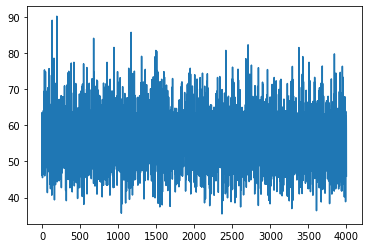

In [16]:
tau_chain50N30 = np.array([x.lamb_block.tau for x in chain_c150_N30])
plt.plot(tau_chain50N30)


In [7]:
tau_chain50N30 = np.array([x.lamb_block.tau for x in chain50N30])
tau_chain50N30_sec = np.array([x.lamb_block.tau for x in chain50N30_sec])
tau_chain50N15 = np.array([x.lamb_block.tau for x in chain50N15])
tau_chain50N15_sec = np.array([x.lamb_block.tau for x in chain50N15_sec])

#tau_chain200 = np.array([x.lamb_block.tau for x in chain200])

NameError: name 'tau_chain50N30' is not defined

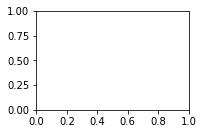

In [10]:
fig_tau = plt.figure()
ax1 = fig_tau.add_subplot(221)
ax1.plot(tau_chain50N30)
plt.title('tau50 N30')

ax2 = fig_tau.add_subplot(222)
ax2.plot(tau_chain50N30_sec)
plt.title('tau50 N30_sec')

ax3 = fig_tau.add_subplot(223)
ax3.plot(tau_chain50N15)
plt.title('tau50 N15')

ax4 = fig_tau.add_subplot(224)
ax4.plot(tau_chain50N15_sec)
plt.title('tau50 N15_sec')

plt.subplots_adjust(hspace=0.4)


#plt.plot(tau_chain200)

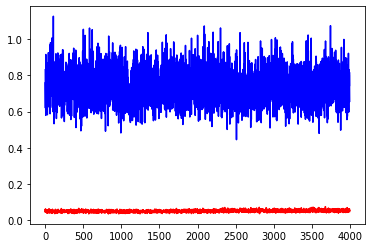

In [6]:
first_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[0] for x in chain_c150_N30])
plt.plot(first_sbar_chain50N30,color='red')

last_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain_c150_N30])
plt.plot(last_sbar_chain50N30,color='blue')



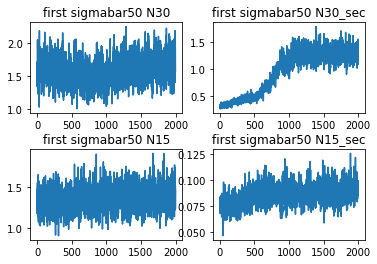

In [10]:
first_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30])
first_sbar_chain50N30_sec = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N30_sec])
first_sbar_chain50N15 = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N15])
first_sbar_chain50N15_sec = np.array([to_numpy(x.sigma_bar)[0] for x in chain50N15_sec])

fig_sigma_first = plt.figure()
ax1 = fig_sigma_first.add_subplot(221)
ax1.plot(first_sbar_chain50N30)
plt.title('first sigmabar50 N30')

ax2 = fig_sigma_first.add_subplot(222)
ax2.plot(first_sbar_chain50N30_sec)
plt.title('first sigmabar50 N30_sec')

ax3 = fig_sigma_first.add_subplot(223)
ax3.plot(first_sbar_chain50N15)
plt.title('first sigmabar50 N15')

ax4 = fig_sigma_first.add_subplot(224)
ax4.plot(first_sbar_chain50N15_sec)
plt.title('first sigmabar50 N15_sec')

plt.subplots_adjust(hspace=0.4)
#first_sigma_bar_chain200 = np.array([to_numpy(x.sigma_bar)[0] for x in chain200])


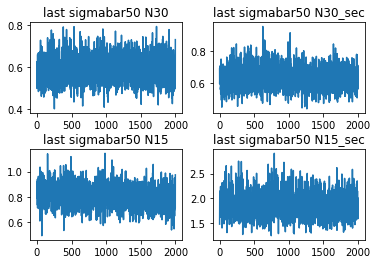

In [11]:
last_sbar_chain50N30 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30])
last_sbar_chain50N30_sec = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N30_sec])
last_sbar_chain50N15 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N15])
last_sbar_chain50N15_sec = np.array([to_numpy(x.sigma_bar)[-1] for x in chain50N15_sec])

fig_sigma_last = plt.figure()
ax1 = fig_sigma_last.add_subplot(221)
ax1.plot(last_sbar_chain50N30)
plt.title('last sigmabar50 N30')

ax2 = fig_sigma_last.add_subplot(222)
ax2.plot(last_sbar_chain50N30_sec)
plt.title('last sigmabar50 N30_sec')

ax3 = fig_sigma_last.add_subplot(223)
ax3.plot(last_sbar_chain50N15)
plt.title('last sigmabar50 N15')

ax4 = fig_sigma_last.add_subplot(224)
ax4.plot(last_sbar_chain50N15_sec)
plt.title('last sigmabar50 N15_sec')

plt.subplots_adjust(hspace=0.4)#last_sigma_bar_chain200 = np.array([to_numpy(x.sigma_bar)[-1] for x in chain200])

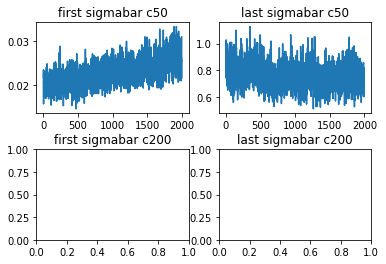

In [26]:
fig_sigma = plt.figure()
ax1 = fig_sigma.add_subplot(221)
ax1.plot(first_sigma_bar_chain50)
plt.title('first sigmabar c50')

ax2 = fig_sigma.add_subplot(222)
ax2.plot(last_sigma_bar_chain50)
plt.title('last sigmabar c50')

ax3 = fig_sigma.add_subplot(223)
#ax3.plot(first_sigma_bar_chain200)
plt.title('first sigmabar c200')

ax4 = fig_sigma.add_subplot(224)
#ax4.plot(last_sigma_bar_chain200)
plt.title('last sigmabar c200')

plt.subplots_adjust(hspace=0.4)


# evaluate performance on simulate data: return performance dataframe 

In [7]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from math import sqrt

p = 50
d = 2
M = 4
n_percluster_s = [50]
list_performance = list()


for n_percluster in n_percluster_s:
    for N in [30]:
        chain = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c200_p_50_d_2_M_4_nperclus_{0}_N_{1}.recordio".format(n_percluster,N), MultivariateMixtureState)
        acc_rates = np.loadtxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c200_p_50_d_2_M_4_nperclus_{0}_N_{1}.csv".format(n_percluster,N), delimiter=',')

        n_cluster_chain = np.array([x.ma for x in chain])
        post_mode_nclus = stats.mode(n_cluster_chain)[0][0] # store in dataframe
        post_avg_nclus = n_cluster_chain.mean() # store in dataframe

        clus_alloc_chain = [x.clus_alloc for x in chain]
        best_clus = cluster_estimate(np.array(clus_alloc_chain))
        true_clus = np.repeat(range(M),n_percluster)
        ari_best_clus = adjusted_rand_score(true_clus, best_clus) # store in dataframe

        aris_chain = np.array([adjusted_rand_score(true_clus, x) for x in clus_alloc_chain])
        mean_aris, sigma_aris = np.mean(aris_chain), np.std(aris_chain) # store mean_aris in dataframe
        CI_aris = stats.norm.interval(0.95, loc=mean_aris, scale=sigma_aris/sqrt(len(aris_chain))) # store in dataframe

        list_performance.append([p,d,M,n_percluster,N,acc_rates[0],acc_rates[1],post_mode_nclus,
                            post_avg_nclus,ari_best_clus,mean_aris,CI_aris])
        
        
df_performance = pd.DataFrame(list_performance, columns=('dim_p', 'dim_d', 'dim_M', 'dim_n_pc', 'dim_N', 'means_ar','lambda_ar',
                                      'mode_nclus', 'avg_nclus', 'ari_best_clus', 'mean_ari', 'CI_ari'))
    


In [8]:
df_performance

,dim_p,dim_d,dim_M,dim_n_pc,dim_N,means_ar,lambda_ar,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,30,0.271052,0.135556,4,4.7805,0.986599,0.977945,"(0.9774766488858483, 0.9784125138856389)"


In [23]:
df_performance

,dim_p,dim_d,dim_M,dim_n_pc,dim_N,sec,means_ar,lambda_ar,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,30,no,0.378893,0.144878,5,4.992667,0.993344,0.990222,"(0.9897160773499515, 0.9907270342114031)"


In [17]:
df_performance

,dim_p,dim_d,dim_M,dim_n_pc,dim_N,sec,means_ar,lambda_ar,mode_nclus,avg_nclus,ari_best_clus,mean_ari,CI_ari
0,50,2,4,50,15,no,0.483343,0.129533,4,4.0490,1.0,0.999009,"(0.9987747379516979, 0.9992436186914521)"
1,50,2,4,50,30,no,0.125313,0.162367,4,4.0005,1.0,0.999461,"(0.9993440923918263, 0.9995774384593866)"
2,50,2,4,50,15,yes,0.290918,0.367233,4,4.0000,1.0,0.997194,"(0.9969334421867165, 0.997454850546528)"
3,50,2,4,50,30,yes,0.281671,0.127567,4,4.0000,1.0,0.999806,"(0.9997354757744913, 0.9998758917437948)"


# Remark: sia N30 che N15 danno stessi risultati, N15_sec non lo uso. 
N15 ha buon acceptance rate

N30 ha comunque buono acceptance rate

N30_sec ha acc rate per means più alto, però leggermente peggiore randindex

# Tesi: confronto con N=30, s=0.8, per c = 20 e 50
d=2, p=50, n_percluster = 50
CANALEDUNSON: uso alfa=1 e alfa=0.5

# store numb of clusters chains
So that, I load only this for plot (faster)

In [110]:
c_s = [50,20]

#for c in c_s:

    chain = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c{0}_p_50_d_2_M_4_nperclus_50_N_30.recordio".format(c), MultivariateMixtureState)
    n_cluster_chain = np.array([int(x.ma) for x in chain])
    np.savetxt("data/data_by_rule_student/chains_compare_CD/num_clus_c{0}_p_50_d_2_M_4_nperclus_50_N_30.csv".format(c), n_cluster_chain,fmt="%d", delimiter=",")


# Check stability numb clusters

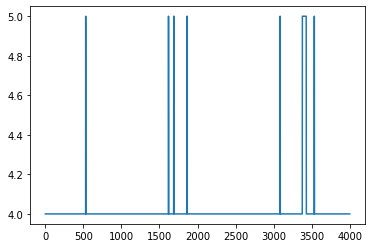

In [112]:
n_cluster_chain = np.loadtxt("data/data_by_rule_student/chains_compare_CD/num_clus_c20_p_50_d_2_M_4_nperclus_50_N_30.csv", delimiter=',')
plt.plot(n_cluster_chain)


# Tabelle Report Tesi APPLAM

In [2]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from math import sqrt


M = 4
n_percluster = 50
c_s = [20,50,200]

list_performance = list()

for c in c_s:

    chain = loadChains("data/data_by_rule_student/chains_compare_CD/chains_c{0}_p_50_d_2_M_4_nperclus_50_N_30.recordio".format(c), MultivariateMixtureState)

    n_cluster_chain = np.array([x.ma for x in chain])
    post_mode_nclus = stats.mode(n_cluster_chain)[0][0] # store in dataframe
    post_avg_nclus = n_cluster_chain.mean() # store in dataframe

    clus_alloc_chain = [x.clus_alloc for x in chain]
    best_clus = cluster_estimate(np.array(clus_alloc_chain))
    true_clus = np.repeat(range(M),n_percluster)
    ari_best_clus = adjusted_rand_score(true_clus, best_clus) # store in dataframe

    aris_chain = np.array([adjusted_rand_score(true_clus, x) for x in clus_alloc_chain])
    mean_aris, sigma_aris = np.mean(aris_chain), np.std(aris_chain) # store mean_aris in dataframe
    CI_aris = stats.norm.interval(0.95, loc=mean_aris, scale=sigma_aris/sqrt(len(aris_chain))) # store in dataframe
    CI_lower = float("{:.3f}".format(CI_aris[0]))
    CI_upper = float("{:.3f}".format(CI_aris[1]))
    CI = (CI_lower, CI_upper)
    
    list_performance.append([M,float("{:.3f}".format(post_mode_nclus)), float("{:.3f}".format(post_avg_nclus)), 
                             float("{:.3f}".format(ari_best_clus)), float("{:.3f}".format(mean_aris)),
                             CI])
        

df_perf = pd.DataFrame(list_performance, columns=('K_true', 'MAP', 'Ek|data', 'ARI_best', 'EARI', 'CIARI'))
df_perf.index = ['(S3)', '(S4)','(S5)']
df_perf.insert(0, 'c', c_s, True)
df_perf.insert(1, 'EM', [2.55, 6.37, 25.46], True)

In [3]:
df_perf

,c,EM,K_true,MAP,Ek|data,ARI_best,EARI,CIARI
(S3),20,2.55,4,4.0,4.017,1.000,1.000,"(0.999, 1.0)"
(S4),50,6.37,4,4.0,4.086,0.987,0.981,"(0.981, 0.982)"
(S5),200,25.46,4,4.0,4.780,0.987,0.978,"(0.977, 0.978)"


In [4]:
print(df_perf.to_latex())

\begin{tabular}{lrrrrrrrl}
\toprule
{} &    c &     EM &  K\_true &  MAP &  Ek|data &  ARI\_best &   EARI &           CIARI \\
\midrule
(S3) &   20 &   2.55 &       4 &  4.0 &    4.017 &     1.000 &  1.000 &    (0.999, 1.0) \\
(S4) &   50 &   6.37 &       4 &  4.0 &    4.086 &     0.987 &  0.981 &  (0.981, 0.982) \\
(S5) &  200 &  25.46 &       4 &  4.0 &    4.780 &     0.987 &  0.978 &  (0.977, 0.978) \\
\bottomrule
\end{tabular}



# Graphics Report Tesi APPLAM

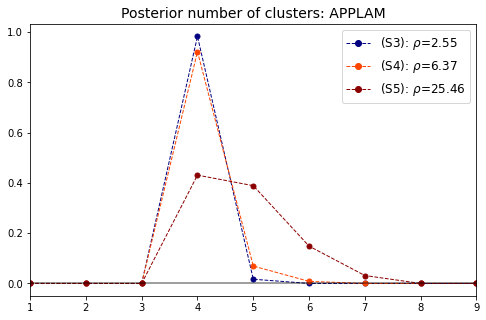

In [13]:
import matplotlib.gridspec as gridspec

# number of components
fig = plt.figure(figsize=(8,5))

lab = ['(S3): $\\rho$=2.55', '(S4): $\\rho$=6.37','(S5): $\\rho$=25.46']
colors = ['navy','orangered','darkred']

c_s = [(20,0),(50,1),(200,2)]

bars = np.arange(1, 10)

for (c,j) in c_s:
    
    n_cluster_chain = np.loadtxt("data/data_by_rule_student/chains_compare_CD/num_clus_c{0}_p_50_d_2_M_4_nperclus_50_N_30.csv".format(c), delimiter=',')
    
    heights = np.array([np.sum(n_cluster_chain == i) for i in bars]) / len(n_cluster_chain)
    plt.plot(bars, heights, 'o--', label=lab[j], markersize=5, linewidth=1, color=colors[j])

plt.legend(fontsize='large', markerscale=1.2)
plt.xlim(1, 9)
plt.axhline(y=0, color='k', alpha=0.5)

plt.title('Posterior number of clusters: APPLAM', fontsize=14)

fig.savefig('APPLAM_post_nclus_pres.pdf',bbox_inches="tight")

In [26]:
from scipy import stats
import pandas as pd


M = 4
n_percluster = 50


acc_rates_c20 = np.loadtxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c20_p_50_d_2_M_4_nperclus_50_N_30.csv", delimiter=',')
acc_rates_c50 = np.loadtxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c50_p_50_d_2_M_4_nperclus_50_N_30.csv", delimiter=',')
acc_rates_c200 = np.loadtxt("data/data_by_rule_student/chains_compare_CD/acc_rate_c200_p_50_d_2_M_4_nperclus_50_N_30.csv", delimiter=',')
       

ss_c20 = np.concatenate([np.array([0.07, "{:.0e}".format(0.00000006)]), np.round(acc_rates_c20,3)])
ss_c50 = np.concatenate([np.array([0.09, "{:.0e}".format(0.00000001)]), np.round(acc_rates_c50,3)])
ss_c200 = np.concatenate([np.array([0.1, "{:.0e}".format(0.000000008)]), np.round(acc_rates_c200,3)])

rows = [ss_c20, ss_c50, ss_c200]

df_acc = pd.DataFrame(rows, columns=('t_means', 't_lambda', 'ar_means', 'ar_lambda'))
df_acc.index = ['(S3)', '(S4)','(S5)']


In [28]:
print(df_acc.to_latex())

\begin{tabular}{lllll}
\toprule
{} & t\_means & t\_lambda & ar\_means & ar\_lambda \\
\midrule
(S3) &    0.07 &    6e-08 &    0.238 &     0.116 \\
(S4) &    0.09 &    1e-08 &    0.186 &     0.193 \\
(S5) &     0.1 &    8e-09 &    0.271 &     0.136 \\
\bottomrule
\end{tabular}



# loading and parsing CD output

In [66]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec025_k0001_nonstand.csv", newline='') as my_csv:
    alloc_matrix = pd.read_csv(my_csv, sep=',', header=None).values


In [16]:
import numpy as np
from math import sqrt
p = 50
d = 2
M = 4
n_percluster = 50

list_performance = list()
n_cluster_chain_CD = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
post_mode_nclus_CD = stats.mode(n_cluster_chain_CD)[0][0] # store in dataframe
post_avg_nclus_CD = n_cluster_chain_CD.mean() # store in dataframe

best_clus_CD = cluster_estimate(alloc_matrix)
true_clus = np.repeat(range(M),n_percluster)
ari_best_clus_CD = adjusted_rand_score(true_clus, best_clus_CD) # store in dataframe

aris_chain_CD = np.array([adjusted_rand_score(true_clus, alloc_matrix[i,:]) for i in range(alloc_matrix.shape[0])])
mean_aris_CD, sigma_aris_CD = np.mean(aris_chain_CD), np.std(aris_chain_CD) # store mean_aris in dataframe
CI_aris_CD = stats.norm.interval(0.95, loc=mean_aris_CD, scale=sigma_aris_CD/sqrt(len(aris_chain_CD))) # store in dataframe
list_performance.append([p,d,M,n_percluster,post_mode_nclus_CD,
                            post_avg_nclus_CD,ari_best_clus_CD,mean_aris_CD,CI_aris_CD])

df_performance_CD = pd.DataFrame(list_performance, columns=('dim_p', 'dim_d', 'dim_M', 'dim_n_pc','mode_nclus', 'avg_nclus', 'ari_best_clus', 'mean_ari', 'CI_ari'))
    

# check stability of the chain

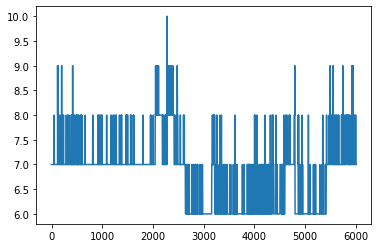

In [67]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec025_k0001_nonstand.csv", newline='') as my_csv:
    alloc_matrix = pd.read_csv(my_csv, sep=',', header=None).values

n_cluster_chain_CD = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
plt.plot(n_cluster_chain_CD)
best_clus_CD = cluster_estimate(alloc_matrix)
(un,co)=np.unique(best_clus_CD, return_counts=True)

In [68]:
print(un)
print(co)

[ 0.  1.  2.  5.  6. 62. 77.]
[ 9 17  1 23 50 50 50]


# Tabelle per Report Tesi

In [1]:
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import numpy as np
from math import sqrt

M = 4
n_percluster = 50

with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec1_k0001_nonstand.csv", newline='') as my_csv:
    a_m_p1_unstand = pd.read_csv(my_csv, sep=',', header=None).values

with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec1_k0001_stand.csv", newline='') as my_csv:
    a_m_p1_stand = pd.read_csv(my_csv, sep=',', header=None).values

with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec05_k0001_nonstand.csv", newline='') as my_csv:
    a_m_p05_unstand = pd.read_csv(my_csv, sep=',', header=None).values

with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec05_k0001_stand.csv", newline='') as my_csv:
    a_m_p05_stand = pd.read_csv(my_csv, sep=',', header=None).values
    
with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec025_k0001_nonstand.csv", newline='') as my_csv:
    a_m_p025_unstand = pd.read_csv(my_csv, sep=',', header=None).values
    
with open("data/data_by_rule_student/alloc_matrix_CD/Sim_Tesi/alloc_matrix_p50_d2_prec025_k0001_stand.csv", newline='') as my_csv:
    a_m_p025_stand = pd.read_csv(my_csv, sep=',', header=None).values

settings = [a_m_p1_unstand, a_m_p1_stand, a_m_p05_unstand, a_m_p05_stand, a_m_p025_unstand, a_m_p025_stand]

In [4]:
list_performance = list()

for alloc_matrix in settings:
    n_cluster_chain_CD = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
    post_mode_nclus_CD = stats.mode(n_cluster_chain_CD)[0][0] # store in dataframe
    post_avg_nclus_CD = n_cluster_chain_CD.mean() # store in dataframe

    best_clus_CD = cluster_estimate(alloc_matrix)
    true_clus = np.repeat(range(M),n_percluster)
    ari_best_clus_CD = adjusted_rand_score(true_clus, best_clus_CD) # store in dataframe

    aris_chain_CD = np.array([adjusted_rand_score(true_clus, alloc_matrix[i,:]) for i in range(alloc_matrix.shape[0])])
    mean_aris_CD, sigma_aris_CD = np.mean(aris_chain_CD), np.std(aris_chain_CD) # store mean_aris in dataframe
    CI_aris_CD = stats.norm.interval(0.95, loc=mean_aris_CD, scale=sigma_aris_CD/sqrt(len(aris_chain_CD))) # store in dataframe
    CI_lower = float("{:.3f}".format(CI_aris_CD[0]))
    CI_upper = float("{:.3f}".format(CI_aris_CD[1]))
    CI = (CI_lower, CI_upper)
    
    list_performance.append([M,float("{:.3f}".format(post_mode_nclus_CD)), float("{:.3f}".format(post_avg_nclus_CD)), 
                             float("{:.3f}".format(ari_best_clus_CD)), float("{:.3f}".format(mean_aris_CD)),
                             CI])
    
    
df_perf_CD = pd.DataFrame(list_performance, columns=('K_true', 'MAP', 'Ek|data', 'ARI_best', 'EARI', 'CIARI'))
df_perf_CD.index = ['(S0)_unstand', '(S0)_stand','(S1)_unstand', '(S1)_stand', '(S2)_unstand', '(S2)_stand']
df_perf_CD.insert(0, 'alpha', [1,1,0.5,0.5,0.25,0.25], True)

In [5]:
df_perf_CD

,alpha,K_true,MAP,Ek|data,ARI_best,EARI,CIARI
(S0)_unstand,1.00,4,4.0,4.830,0.048,0.044,"(0.043, 0.044)"
(S0)_stand,1.00,4,17.0,17.514,0.438,0.420,"(0.419, 0.422)"
(S1)_unstand,0.50,4,4.0,4.290,0.076,0.088,"(0.086, 0.089)"
(S1)_stand,0.50,4,11.0,11.329,0.715,0.687,"(0.686, 0.689)"
(S2)_unstand,0.25,4,7.0,6.756,0.885,0.878,"(0.878, 0.878)"
(S2)_stand,0.25,4,4.0,4.136,1.000,0.995,"(0.995, 0.996)"


In [70]:
df_perf_CD

,alpha,K_true,MAP,Ek|data,ARI_best,EARI,CIARI
(S0)_unstand,1.00,4,4.0,4.830,0.048,0.044,"(0.043, 0.044)"
(S0)_stand,1.00,4,17.0,17.514,0.438,0.420,"(0.419, 0.422)"
(S1)_unstand,0.50,4,4.0,4.290,0.076,0.088,"(0.086, 0.089)"
(S1)_stand,0.50,4,11.0,11.329,0.715,0.687,"(0.686, 0.689)"
(S2)_unstand,0.25,4,7.0,6.756,0.885,0.878,"(0.878, 0.878)"
(S2)_stand,0.25,4,4.0,4.136,1.000,0.995,"(0.995, 0.996)"


In [136]:
print(df_perf_CD.to_latex())

\begin{tabular}{lrrrrrrl}
\toprule
{} &  alpha &  K\_true &   MAP &  Ek|data &  ARI\_best &   EARI &           CIARI \\
\midrule
(S0)\_unstand &   1.00 &       4 &   4.0 &    4.830 &     0.048 &  0.044 &  (0.043, 0.044) \\
(S0)\_stand   &   1.00 &       4 &  17.0 &   17.514 &     0.438 &  0.420 &  (0.419, 0.422) \\
(S1)\_unstand &   0.50 &       4 &   4.0 &    4.290 &     0.076 &  0.088 &  (0.086, 0.089) \\
(S1)\_stand   &   0.50 &       4 &  11.0 &   11.329 &     0.715 &  0.687 &  (0.686, 0.689) \\
(S2)\_unstand &   0.25 &       4 &   7.0 &    6.756 &     0.885 &  0.878 &  (0.878, 0.878) \\
(S2)\_stand   &   0.25 &       4 &   4.0 &    4.136 &     1.000 &  0.995 &  (0.995, 0.996) \\
\bottomrule
\end{tabular}



# Graphics Report Tesi: posterior number of components

# 2 Plots together

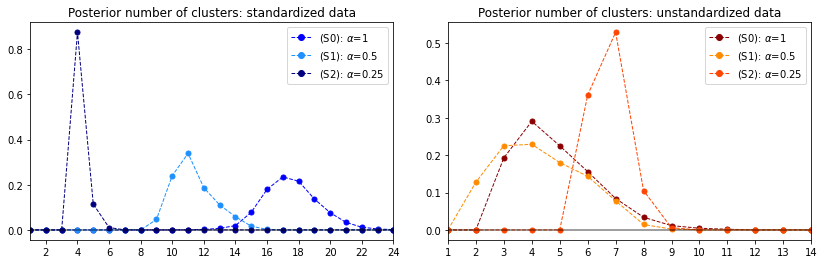

In [8]:
import matplotlib.gridspec as gridspec

# number of components
fig = plt.figure(figsize=(14,4))
gs = gridspec.GridSpec(1, 2)

lab = ['(S0): $\\alpha$=1', '(S0): $\\alpha$=1','(S1): $\\alpha$=0.5', '(S1): $\\alpha$=0.5', '(S2): $\\alpha$=0.25', '(S2): $\\alpha$=0.25']
settings = [a_m_p1_unstand, a_m_p1_stand,a_m_p05_unstand, a_m_p05_stand, a_m_p025_unstand, a_m_p025_stand]
colors = ['darkred','blue','darkorange','dodgerblue','orangered','navy']

ax1 = fig.add_subplot(gs[0,0]) # standardized
bars = np.arange(1, 25)

for j in [1,3,5]:
    alloc_matrix = settings[j]
    n_cluster_chain = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
    
    heights = np.array([np.sum(n_cluster_chain == i) for i in bars]) / len(n_cluster_chain)
    ax1.plot(bars, heights, 'o--', label=lab[j], markersize=5, linewidth=1, color=colors[j])
    plt.xticks(np.arange(0, 25, step=2)) 

ax1.legend(fontsize='medium', markerscale=1.2)
plt.xlim(1, 24)
ax1.axhline(y=0, color='k', alpha=0.5)

plt.title('Posterior number of clusters: standardized data')

ax2 = fig.add_subplot(gs[0,1]) # unstandardized
bars = np.arange(1, 15)

for j in [0,2,4]:
    alloc_matrix = settings[j]
    n_cluster_chain = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
    
    heights = np.array([np.sum(n_cluster_chain == i) for i in bars]) / len(n_cluster_chain)
    ax2.plot(bars, heights, 'o--', label=lab[j], markersize=5, linewidth=1, color=colors[j])
    plt.xticks(np.arange(0, 15, step=1)) 

ax2.legend(fontsize='medium', markerscale=1.2)
plt.xlim(1, 14)
ax2.axhline(y=0, color='k', alpha=0.5)

plt.title('Posterior number of clusters: unstandardized data')

gs.update(wspace=0.15, hspace=10)

fig.savefig('Lamb_post_nclus_2plots.pdf',bbox_inches="tight")

# single separate plots

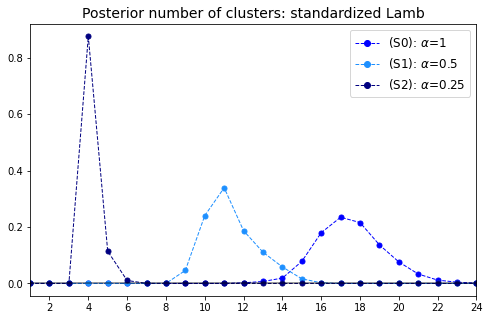

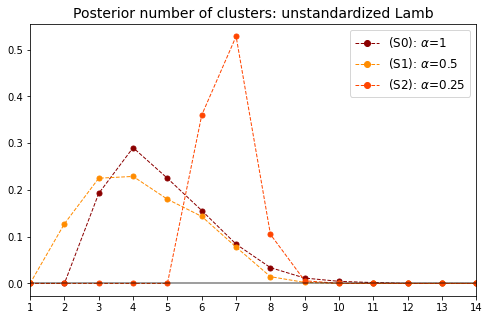

In [10]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

lab = ['(S0): $\\alpha$=1', '(S0): $\\alpha$=1','(S1): $\\alpha$=0.5', '(S1): $\\alpha$=0.5', '(S2): $\\alpha$=0.25', '(S2): $\\alpha$=0.25']
settings = [a_m_p1_unstand, a_m_p1_stand,a_m_p05_unstand, a_m_p05_stand, a_m_p025_unstand, a_m_p025_stand]
colors = ['darkred','blue','darkorange','dodgerblue','orangered','navy']

# standardized data
fig = plt.figure(figsize=(8,5))

bars = np.arange(1, 25)

for j in [1,3,5]:
    alloc_matrix = settings[j]
    n_cluster_chain = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
    
    heights = np.array([np.sum(n_cluster_chain == i) for i in bars]) / len(n_cluster_chain)
    plt.plot(bars, heights, 'o--', label=lab[j], markersize=5, linewidth=1, color=colors[j])
    plt.xticks(np.arange(0, 25, step=2)) 

plt.legend(fontsize='large', markerscale=1.2)
plt.xlim(1, 24)
plt.axhline(y=0, color='k', alpha=0.5)

plt.title('Posterior number of clusters: standardized Lamb', fontsize=14)

fig.savefig('standard_Lamb_post_pres.pdf',bbox_inches="tight")

#unstandardized data
fig2 = plt.figure(figsize=(8,5))

bars = np.arange(1, 15)

for j in [0,2,4]:
    alloc_matrix = settings[j]
    n_cluster_chain = np.array([len(np.unique(alloc_matrix[i,:])) for i in range(alloc_matrix.shape[0])])
    
    heights = np.array([np.sum(n_cluster_chain == i) for i in bars]) / len(n_cluster_chain)
    plt.plot(bars, heights, 'o--', label=lab[j], markersize=5, linewidth=1, color=colors[j])
    plt.xticks(np.arange(0, 15, step=1)) 

plt.legend(fontsize='large', markerscale=1.2)
plt.xlim(1, 14)
plt.axhline(y=0, color='k', alpha=0.5)

plt.title('Posterior number of clusters: unstandardized Lamb', fontsize=14)

fig2.savefig('unstandard_Lamb_post_pres.pdf',bbox_inches="tight")